# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2 = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

#### 1. Минимизируемый функционал для первых двух главных компонент

Рассматриваем матрицу данных  
$X \in \mathbb{R}^{n \times p}$ — строки – это объекты, столбцы — признаки.  
Данные считаем центрированными по признакам.

Хотим отобразить данные в двумерное линейное подпространство:

- $W = [w_1, w_2] \in \mathbb{R}^{p \times 2}$ — ортонормальный базис подпространства, $W^\top W = I_2$;
- $Z \in \mathbb{R}^{n \times 2}$ — координаты объектов в новом базисе.

Приближение объекта:
$$
x_i \approx \hat x_i = w_1 z_{i1} + w_2 z_{i2} = W z_i .
$$

Функция потерь (сумма квадратов ошибок реконструкции):
$$
L(W, Z) = \sum\limits_{i=1}^n \bigl\| x_i - W z_i \bigr\|^2
        = \sum\limits_{i=1}^n \bigl\| x_i - w_1 z_{i1} - w_2 z_{i2} \bigr\|^2 .
$$

Ограничения ортонормированности:
$$
w_1^\top w_1 = 1, 
\qquad
w_2^\top w_2 = 1,
\qquad
w_1^\top w_2 = 0.
$$

---
#### 2. Новые координаты — это проекции на $w_1$ и $w_2$

#### Одна компонента

Пусть есть один базисный вектор $w_1 \in \mathbb{R}^p$ и числа $z_{i1}$:
$$
\hat x_i = w_1 z_{i1}.
$$
Функция потерь:
$$
L_1(w_1, z) = \sum_{i=1}^n \|x_i - w_1 z_{i1}\|^2.
$$

Фиксируем $w_1$ и минимизируем по $z_{i1}$. Для одного объекта:
$$
\ell_i(z_{i1}) = \|x_i - w_1 z_{i1}\|^2
= (x_i - w_1 z_{i1})^\top (x_i - w_1 z_{i1}).
$$

Раскрываем скобки:
$$
\ell_i(z_{i1})
= x_i^\top x_i - 2 z_{i1} x_i^\top w_1 + z_{i1}^2\, w_1^\top w_1.
$$

Предположим, что $w_1$ нормирован:
$$
w_1^\top w_1 = 1.
$$

Берём производную по $z_{i1}$ и приравниваем нулю:
$$
\frac{\partial \ell_i}{\partial z_{i1}}
= -2 x_i^\top w_1 + 2 z_{i1} w_1^\top w_1
= -2 x_i^\top w_1 + 2 z_{i1} = 0.
$$

Отсюда
$$
\boxed{z_{i1} = x_i^\top w_1.}
$$

То есть оптимальная координата вдоль $w_1$ — это скалярное произведение $x_i$ с $w_1$.  
При таком выборе
$$
\hat x_i = w_1 z_{i1} = w_1 (x_i^\top w_1)
$$
— это именно **ортогональная проекция** $x_i$ на прямую $\mathrm{span}(w_1)$.



#### Две компоненты

Теперь берём два ортонормированных базисных вектора $w_1, w_2$:
$$
w_1^\top w_1 = 1,\quad w_2^\top w_2 = 1,\quad w_1^\top w_2 = 0,
$$
и приближаем
$$
\hat x_i = w_1 z_{i1} + w_2 z_{i2}.
$$

Функция потерь:
$$
L(W, Z) = \sum_{i=1}^n \bigl\|x_i - w_1 z_{i1} - w_2 z_{i2}\bigr\|^2.
$$

Опять фиксируем $w_1, w_2$ и минимизируем по $z_{i1}, z_{i2}$.  
Для одного объекта:
$$
\ell_i(z_{i1}, z_{i2})
= \|x_i - w_1 z_{i1} - w_2 z_{i2}\|^2.
$$

Раскрываем:
$$
\ell_i
= (x_i - w_1 z_{i1} - w_2 z_{i2})^\top
  (x_i - w_1 z_{i1} - w_2 z_{i2}).
$$

После аккуратного раскрытия и использования ортонормальности получаем:
$$
\ell_i
= x_i^\top x_i
- 2 z_{i1} x_i^\top w_1
- 2 z_{i2} x_i^\top w_2
+ z_{i1}^2 + z_{i2}^2.
$$

Частные производные:
$$
\frac{\partial \ell_i}{\partial z_{i1}}
= -2 x_i^\top w_1 + 2 z_{i1}, \qquad
\frac{\partial \ell_i}{\partial z_{i2}}
= -2 x_i^\top w_2 + 2 z_{i2}.
$$

Приравниваем нулю:
$$
-2 x_i^\top w_1 + 2 z_{i1} = 0 \;\Rightarrow\;
\boxed{z_{i1} = x_i^\top w_1,}
$$
$$
-2 x_i^\top w_2 + 2 z_{i2} = 0 \;\Rightarrow\;
\boxed{z_{i2} = x_i^\top w_2.}
$$

То есть и в двумерном случае минимизация MSE по координатам даёт
**ортогональные проекции** на каждый базисный вектор:
$$
z_i =
\begin{pmatrix}
z_{i1} \\
z_{i2}
\end{pmatrix}
=
\begin{pmatrix}
w_1^\top x_i \\
w_2^\top x_i
\end{pmatrix},
\qquad
\hat x_i = w_1 w_1^\top x_i + w_2 w_2^\top x_i.
$$



#### Обобщение на $k$ компонент (матричная запись)

Соберём базисные векторы в матрицу
$$
W = [w_1,\dots,w_k] \in \mathbb{R}^{p\times k}, \qquad W^\top W = I_k,
$$
а координаты объекта — в вектор $z_i \in \mathbb{R}^k$. Тогда
$$
\hat x_i = W z_i,
\qquad
L(W, Z) = \sum_{i=1}^n \|x_i - W z_i\|^2.
$$

Для фиксированного $W$ минимизируем по $z_i$:
$$
\frac{\partial}{\partial z_i} \|x_i - W z_i\|^2
= -2 W^\top x_i + 2 W^\top W z_i = 0.
$$

Так как $W^\top W = I_k$, получаем
$$
\boxed{z_i = W^\top x_i.}
$$

Тогда восстановление:
$$
\hat x_i = W z_i = W W^\top x_i.
$$

То есть в общем случае **минимизация ошибки восстановления при ортонормальных столбцах $W$ приводит к тому, что оптимальное сжатое представление — это ортогональная проекция на подпространство $\mathrm{span}(w_1,\dots,w_k)$**, а восстановление — это проекция обратно в исходное пространство.


**Вывод:** оптимальные новые координаты — это ортогональные проекции исходного вектора $x_i$ на направления $w_1$ и $w_2$.

---
#### 3. Векторы $w_1, w_2$ — собственные векторы ковариационной матрицы

Пусть данные заданы матрицей $X \in \mathbb{R}^{n \times p}$ (строки — объекты),
а $W = [w_1,\dots,w_k] \in \mathbb{R}^{p \times k}$ — матрица базисных векторов с
ортонормированными столбцами:
$$
W^\top W = I_k.
$$

Функция потерь:
$$
L(W) = \|X - X W W^\top\|^2.
$$

Наша цель — показать, что
$$
L(W) = \|X\|^2 - n\,\mathrm{tr}(W^\top \Sigma W),
\qquad
\Sigma = \frac{1}{n}X^\top X.
$$



#### Запись через строки матрицы $X$

Обозначим $x_i^\top$ — $i$-ю строку $X$ (объект номер $i$), а вектор признаков $x_i$ — столбец.
Тогда проекция $x_i$ на подпространство, порождённое столбцами $W$, равна
$$
\hat x_i = W W^\top x_i.
$$

Функция потерь — это сумма квадратов расстояний до подпространства:
$$
L(W) = \sum_{i=1}^n \bigl\|x_i - W W^\top x_i\bigr\|^2.
$$



#### Раскладываем квадрат для одного объекта

Рассмотрим одно слагаемое
$$
\ell_i = \bigl\|x_i - W W^\top x_i\bigr\|^2.
$$

Норма в квадрате — это скалярное произведение:
$$
\ell_i = (x_i - W W^\top x_i)^\top (x_i - W W^\top x_i).
$$

Раскроем скобки:
1. Первый член:
   $$
   x_i^\top x_i.
   $$
2. Два перекрёстных члена:
   $$
   - x_i^\top W W^\top x_i - x_i^\top W W^\top x_i
   = -2 x_i^\top W W^\top x_i.
   $$
3. Последний член:
   $$
   (W W^\top x_i)^\top (W W^\top x_i)
   = x_i^\top W W^\top W W^\top x_i.
   $$

Используем ортонормальность столбцов $W$:
$$
W^\top W = I_k
\;\Rightarrow\;
W W^\top W W^\top = W (W^\top W) W^\top = W I_k W^\top = W W^\top.
$$

Тогда последний член превращается в $x_i^\top W W^\top x_i$, и
$$
\ell_i = x_i^\top x_i - 2 x_i^\top W W^\top x_i + x_i^\top W W^\top x_i
       = x_i^\top x_i - x_i^\top W W^\top x_i.
$$



#### Связь с $\|W^\top x_i\|^2$

Заметим, что
$$
\|W^\top x_i\|^2 = (W^\top x_i)^\top (W^\top x_i)
= x_i^\top W W^\top x_i.
$$

Поэтому
$$
\ell_i = \|x_i\|^2 - \|W^\top x_i\|^2.
$$

Теперь суммируем по всем объектам:
$$
L(W) = \sum_{i=1}^n \ell_i
= \sum_{i=1}^n \|x_i\|^2 - \sum_{i=1}^n \|W^\top x_i\|^2.
$$

Первая сумма — это квадрат нормы Фробениуса матрицы $X$:
$$
\sum_{i=1}^n \|x_i\|^2 = \|X\|^2,
$$
поэтому
$$
L(W) = \|X\|^2 - \sum_{i=1}^n \|W^\top x_i\|^2.
$$

Осталось выразить вторую сумму через ковариационную матрицу.



#### Вторая сумма и ковариация

По определению ковариационной матрицы центрированных данных:
$$
\Sigma = \frac{1}{n} X^\top X
\quad\Longrightarrow\quad
X^\top X = n \Sigma.
$$

С другой стороны, матрицу $X^\top X$ можно записать как сумму внешних произведений:
$$
X^\top X = \sum_{i=1}^n x_i x_i^\top.
$$

Рассмотрим матрицу
$$
W^\top X^\top X W.
$$

Подставляем разложение:
$$
W^\top X^\top X W
= W^\top \left(\sum_{i=1}^n x_i x_i^\top\right) W
= \sum_{i=1}^n W^\top x_i x_i^\top W.
$$

Обозначим $y_i = W^\top x_i$. Тогда одно слагаемое:
$$
W^\top x_i x_i^\top W = y_i y_i^\top.
$$

След такой матрицы:
$$
\mathrm{tr}(y_i y_i^\top) = \|y_i\|^2 = \|W^\top x_i\|^2.
$$

Поэтому
$$
\mathrm{tr}(W^\top X^\top X W)
= \sum_{i=1}^n \mathrm{tr}(y_i y_i^\top)
= \sum_{i=1}^n \|W^\top x_i\|^2.
$$

Отсюда
$$
\sum_{i=1}^n \|W^\top x_i\|^2
= \mathrm{tr}(W^\top X^\top X W).
$$

Теперь подставляем $X^\top X = n \Sigma$:
$$
\mathrm{tr}(W^\top X^\top X W)
= \mathrm{tr}\bigl(W^\top (n \Sigma) W\bigr)
= n\,\mathrm{tr}(W^\top \Sigma W).
$$

Итого:
$$
\sum_{i=1}^n \|W^\top x_i\|^2
= n\,\mathrm{tr}(W^\top \Sigma W).
$$



#### Финальный вид функции потерь

Подставляем во формулу для $L(W)$:
$$
L(W)
= \|X\|^2 - \sum_{i=1}^n \|W^\top x_i\|^2
= \|X\|^2 - n\,\mathrm{tr}(W^\top \Sigma W).
$$

Таким образом, аккуратно раскрывая квадраты и используя ортонормальность столбцов $W$, мы получаем переход:
$$
L(W) = \|X - XWW^\top\|^2
\quad\Longrightarrow\quad
L(W) = \|X\|^2 - n\,\mathrm{tr}(W^\top \Sigma W).
$$
---

#### 4. Статистический смысл собственных чисел

Новые координаты по первым двум главным компонентам:
$$
z_{i1} = w_1^\top x_i, \qquad
z_{i2} = w_2^\top x_i.
$$

Выборочная дисперсия первой главной компоненты:
$$
\widehat{\mathrm{Var}}(z_{\cdot 1})
= \frac{1}{n} \sum_{i=1}^n z_{i1}^2
= \frac{1}{n} \sum_{i=1}^n (w_1^\top x_i)^2
= w_1^\top \left( \frac{1}{n} \sum_{i=1}^n x_i x_i^\top \right) w_1
= w_1^\top \Sigma \, w_1.
$$

Так как $w_1$ — собственный вектор $\Sigma$ с собственным числом $\lambda_1$,
$$
\Sigma w_1 = \lambda_1 w_1,
$$
то
$$
w_1^\top \Sigma w_1
= w_1^\top (\lambda_1 w_1)
= \lambda_1 (w_1^\top w_1)
= \lambda_1.
$$

Аналогично для второй компоненты:
$$
\widehat{\mathrm{Var}}(z_{\cdot 2})
= w_2^\top \Sigma w_2
= \lambda_2.
$$

Таким образом, каждое собственное число $\lambda_j$ равно выборочной дисперсии соответствующей главной компоненты $z_{\cdot j}$.

Если собственные значения упорядочены по убыванию:
$$
\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_p,
$$
то
$$
\sum_{j=1}^p \lambda_j = \mathrm{tr}(\Sigma)
$$
есть суммарная дисперсия данных, а
$$
\frac{\lambda_j}{\sum_{k=1}^p \lambda_k}
$$
— доля общей дисперсии, объясняемая $j$-й главной компонентой.

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:** ###


Пусть дана матрица данных $X \in \mathbb{R}^{n \times p}$.  
Рассматриваем симметричную матрицу
$$
XX^T \in \mathbb{R}^{n \times n}.
$$

Нужно показать, как по её собственному разложению получить собственные векторы и значения для матрицы
$$
X^T X \in \mathbb{R}^{p \times p}.
$$


#### 1. Спектральное разложение $XX^T$

Так как матрица $XX^T$ симметрична и неотрицательно определена, по спектральной теореме существует ортогональная матрица $U \in \mathbb{R}^{n \times n}$ и диагональная матрица $\Lambda$, такие что
$$
U^T XX^T U = \Lambda,
$$
где $\Lambda = \mathrm{diag}(\lambda_1,\dots,\lambda_n)$ — матрица собственных значений $XX^T$, а столбцы $U$ — соответствующие ортонормированные собственные векторы.

Эквивалентно можно записать
$$
XX^T U = U \Lambda.
$$


#### 2. Как из собственных векторов $XX^T$ получить собственные векторы $X^T X$

Из равенства
$$
XX^T U = U \Lambda
$$
умножим слева на $X^T$:
$$
X^T XX^T U = X^T U \Lambda.
$$

Сгруппируем:
$$
(X^T X)(X^T U) = X^T U \Lambda.
$$

Отсюда видно, что столбцы матрицы $X^T U$ являются собственными векторами матрицы $X^T X$, а собственные значения те же $\lambda_i$. То есть

- $X^T U$ — матрица (возможно неортонормированных) собственных векторов для $X^T X$;
- диагональные элементы $\Lambda$ — соответствующие собственные значения.


#### 3. Ортогональность столбцов $X^T U$

Рассмотрим матрицу
$$
V = X^T U \in \mathbb{R}^{p \times n}.
$$

Посчитаем матрицу Грама (скалярных произведений столбцов $V$):
$$
V^T V = (X^T U)^T (X^T U) = U^T X X^T U.
$$

Но мы знаем, что
$$
U^T XX^T U = \Lambda.
$$

Значит,
$$
V^T V = \Lambda.
$$

Так как $\Lambda$ — диагональная, то произведение $V^T V$ диагонально.  
Это означает, что разные столбцы матрицы $V = X^T U$ взаимно ортогональны (скалярное произведение любых двух разных столбцов равно нулю).

Однако диагональные элементы $\Lambda$ в общем случае не равны 1, а равны $\lambda_i$.  
Значит, нормы столбцов не равны единице, и столбцы ортогональны, но не ортонормированы.


#### 4. Нормы столбцов $X^T U$ и переход к ортонормированным векторам

Из равенства
$$
V^T V = \Lambda
$$
видно, что диагональный элемент $\Lambda_{ii} = \lambda_i$ равен
$$ 
\lambda_i = \|v_i\|^2,
$$
где $v_i$ — $i$-й столбец матрицы $V = X^T U$.

Следовательно, норма $i$-го столбца равна
$$
\|v_i\| = \sqrt{\lambda_i}.
$$

Чтобы получить ортонормированные собственные векторы, достаточно каждый столбец $v_i$ поделить на его норму:
$$
w_i = \frac{v_i}{\|v_i\|}
    = \frac{1}{\sqrt{\lambda_i}} v_i
    = \frac{1}{\sqrt{\lambda_i}} X^T u_i,
$$
где $u_i$ — соответствующий собственный вектор матрицы $XX^T$.

В матричном виде введём диагональную матрицу
$$
\Lambda^{-\frac{1}{2}}
= \mathrm{diag}\!\left(\frac{1}{\sqrt{\lambda_1}},\dots,\frac{1}{\sqrt{\lambda_n}}\right)
$$
(берём только те $\lambda_i$, которые ненулевые) и положим
$$
W = V \Lambda^{-\frac{1}{2}} = X^T U \Lambda^{-\frac{1}{2}}.
$$

Тогда
$$
W^T W
= \Lambda^{-\frac{1}{2}} V^T V \Lambda^{-\frac{1}{2}}
= \Lambda^{-\frac{1}{2}} \Lambda \Lambda^{-\frac{1}{2}}
= I.
$$

Значит, столбцы матрицы $W$ — ортонормированные собственные векторы матрицы $X^T X$.

Связь с PCA:

- матрица $X^T X$ (с точностью до деления на $n$) — ковариационная матрица признаков;
- векторы
  $$
  w_i = \frac{1}{\sqrt{\lambda_i}} X^T u_i
  $$
  — главные направления (главные компоненты в пространстве признаков);
- $\lambda_i$ — собственные значения, пропорциональные дисперсиям соответствующих главных компонент.

In [35]:
import numpy as np

X = np.array([
    [1., 2., 3.],
    [0., 1., 4.],
    [2., 0., 1.]
])

XXt = X @ X.T
lam, U = np.linalg.eigh(XXt)  

print("XX^T =\n", XXt)
print("Собственные значения XX^T:", lam)
print("Проверка U^T XX^T U = Λ:\n", U.T @ XXt @ U)

XtX = X.T @ X
lam2, W_direct = np.linalg.eigh(XtX)

print("\nX^T X =\n", XtX)
print("Собственные значения X^T X:", lam2)

V = X.T @ U
lhs = XtX @ V
rhs = V * lam   

print("\nНорма (X^T X)(X^T U) - (X^T U)Λ:",
      np.linalg.norm(lhs - rhs))

Gram = V.T @ V
print("\nV^T V =\n", Gram)

mask = lam > 1e-12
lam_nonzero = lam[mask]
U_nonzero = U[:, mask]
V_nonzero = X.T @ U_nonzero

W = V_nonzero / np.sqrt(lam_nonzero)

print("\nW^T W (должно быть почти I):\n", W.T @ W)

print("\nСобственные значения XtX (direct):", lam2)
print("Собственные значения через XX^T :", lam_nonzero)

XX^T =
 [[14. 14.  5.]
 [14. 17.  4.]
 [ 5.  4.  5.]]
Собственные значения XX^T: [ 1.          3.88934241 31.11065759]
Проверка U^T XX^T U = Λ:
 [[ 1.00000000e+00  1.94291859e-16 -3.07078541e-15]
 [-1.16338894e-16  3.88934241e+00 -8.88745885e-16]
 [-3.55271368e-15 -1.77635684e-15  3.11106576e+01]]

X^T X =
 [[ 5.  2.  5.]
 [ 2.  5. 10.]
 [ 5. 10. 26.]]
Собственные значения X^T X: [ 1.          3.88934241 31.11065759]

Норма (X^T X)(X^T U) - (X^T U)Λ: 3.3668737373695216e-14

V^T V =
 [[ 1.00000000e+00  1.38777878e-16 -2.22044605e-15]
 [ 1.38777878e-16  3.88934241e+00 -1.74266202e-15]
 [-2.22044605e-15 -1.74266202e-15  3.11106576e+01]]

W^T W (должно быть почти I):
 [[ 1.00000000e+00  5.55111512e-17 -5.55111512e-16]
 [ 5.55111512e-17  1.00000000e+00 -1.67321294e-16]
 [-5.55111512e-16 -1.67321294e-16  1.00000000e+00]]

Собственные значения XtX (direct): [ 1.          3.88934241 31.11065759]
Собственные значения через XX^T : [ 1.          3.88934241 31.11065759]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

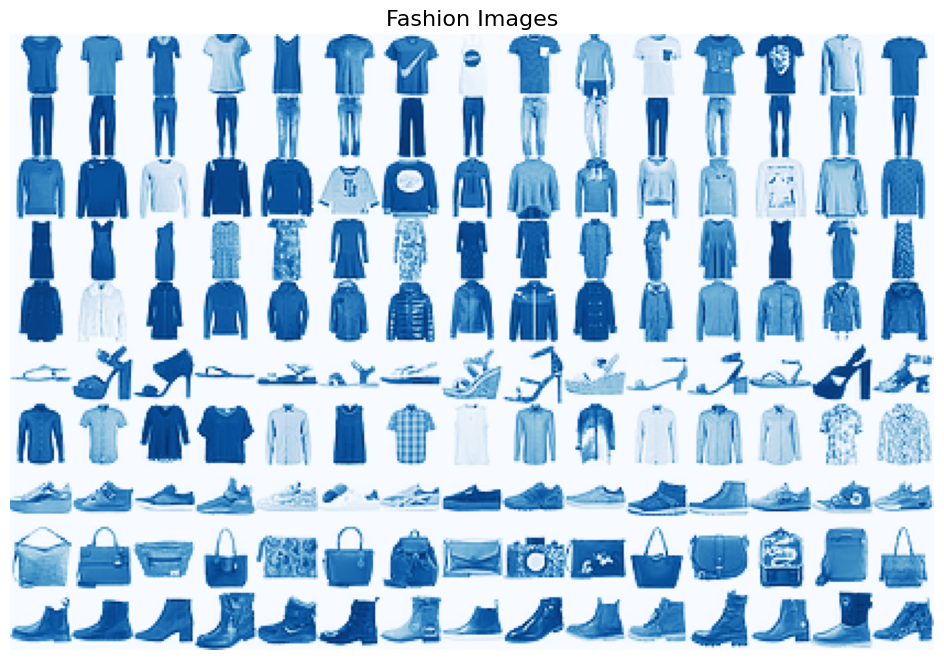

In [5]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [6]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    stratify=y,         
    random_state=42     
)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log_reg = LogisticRegression(
    max_iter=2000,
    tol=0.001,
    random_state=42
)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

f1

0.7446483892266774

**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:** ###

### Как работает `f1_score` и что показывает эта метрика

Для бинарной классификации определим:

**Точность (precision)**:
$$
\text{Precision} = \frac{TP}{TP + FP},
$$
где $TP$ — число истинно положительных предсказаний, $FP$ — ложноположительных.

**Полнота (recall)**:
$$
\text{Recall} = \frac{TP}{TP + FN},
$$
где $FN$ — ложноотрицательные.

**F1-мера** — гармоническое среднее precision и recall:
$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}
            {\text{Precision} + \text{Recall}}.
$$

Высокое значение $F_1$ означает, что и точность, и полнота высокие. Если один из показателей сильно падает, $F_1$ тоже уменьшается.

---

### Плюсы и минусы F1-меры

**Плюсы:**

- Объединяет precision и recall в одну метрику.
- Подходит, когда важны и ложные срабатывания, и пропуски.
- Лучше, чем accuracy, ведёт себя при дисбалансе классов.

**Минусы:**

- Не показывает отдельно precision и recall, можно потерять детали.
- Симметрично относится к precision и recall; если один важнее другого, лучше использовать другие метрики (например, $F_\beta$ или PR-кривую).
- В многоклассовом случае нужно явно выбирать схему усреднения (параметр `average`).

---

### Параметр `average='weighted'`

В многоклассовой задаче `sklearn.metrics.f1_score` сначала считает $F_1$ **для каждого класса**, затем усредняет.

Параметр `average='weighted'` означает:
> Усреднить $F_1$ по классам с весами, пропорциональными числу объектов каждого класса (support).

Формула:
$$
F_1^{\text{weighted}} =
\frac{1}{N} \sum_{k} n_k \cdot F_1^{(k)},
$$
где
- $F_1^{(k)}$ — F1-мера для класса $k$,
- $n_k$ — количество объектов класса $k$ в истинной разметке,
- $N = \sum_k n_k$ — общее число объектов.

Такое усреднение делает вклад каждого класса пропорциональным его размеру. Редкие классы влияют на общий результат меньше, чем массовые.

---

### Другие значения параметра `average` и когда их использовать

Основные варианты:

1. **`average='binary'`**  
   Используется в бинарной классификации. Считается $F_1$ только для "положительного" класса (`pos_label`).

2. **`average='micro'`**  
   Сначала суммируются $TP$, $FP$, $FN$ по всем классам, затем считаются общие precision, recall и F1.  
   Фокус на общей доле правильно классифицированных объектов.  
   Для обычной многоклассовой задачи `micro-F1` совпадает с accuracy.

3. **`average='macro'`**  
   Считается $F_1^{(k)}$ для каждого класса и берётся обычное среднее:
   $$
   F_1^{\text{macro}} = \frac{1}{K} \sum_{k=1}^K F_1^{(k)}.
   $$
   Все классы равноважны, даже редкие. Полезно при сильном дисбалансе, если важно качество на каждом классе.

4. **`average='weighted'`**  
   Взвешенное по размеру класса среднее (то, что используется в задаче).  
   Компромисс между "учесть дисбаланс" и "не потерять общую картинку".

5. **`average='samples'`**  
   Используется в multi-label задачах (несколько меток на один объект).  
   Для каждого объекта считается свой F1 по его меткам, затем усреднение по объектам.

6. **`average=None`**  
   Возвращается массив $F_1$ по классам. Удобно для анализа, какие именно классы модель предсказывает хорошо, а какие плохо.

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

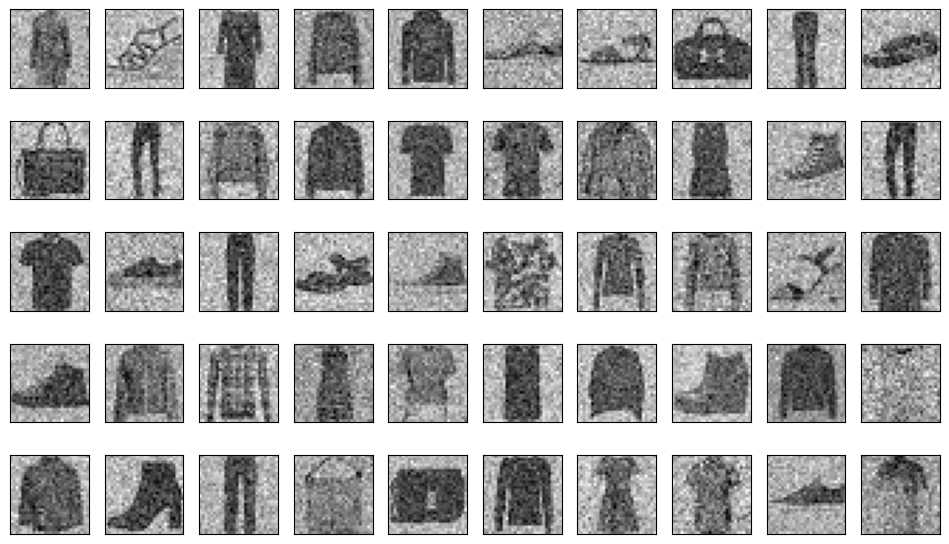

In [36]:
scale = 50
X_test_noisy = np.random.normal(X_test, scale)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:** ###

При увеличении параметра `scale` в выражении `np.random.normal(X_test, scale)` изображения становятся всё менее разборчивыми. Это связано с тем, что `scale` является стандартным отклонением добавляемого гауссовского шума: чем больше `scale`, тем сильнее искажаются значения пикселей.

Визуально это проявляется как уменьшение отношения сигнал/шум: при небольшом `scale` структура цифры ещё читается, при больших значениях шум по величине сравним с самим изображением, и класс объекта определить трудно. Соответственно, по мере роста шума качество классификации (например, F1-мера) ожидаемо ухудшается.

Таким образом, эксперимент демонстрирует важность качества данных и показывает, что модель чувствительна к сильным шумовым искажениям входа.

При увеличении параметра `scale` в выражении `np.random.normal(X_test, scale)` изображения становятся всё менее разборчивыми. Это связано с тем, что `scale` является стандартным отклонением добавляемого гауссовского шума: чем больше `scale`, тем сильнее искажаются значения пикселей.

Визуально это проявляется как уменьшение отношения сигнал/шум: при небольшом `scale` структура цифры ещё читается, при больших значениях шум по величине сравним с самим изображением, и класс объекта определить трудно. Соответственно, по мере роста шума качество классификации (например, F1-мера) ожидаемо ухудшается.

Таким образом, эксперимент демонстрирует важность качества данных и показывает, что модель чувствительна к сильным шумовым искажениям входа.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [37]:
y_pred_noisy = log_reg.predict(X_test_noisy)

In [38]:
from sklearn.metrics import f1_score

f1_noisy = f1_score(y_test, y_pred_noisy, average='weighted')
f1_noisy

0.5016576962716839

**Ваши выводы:** ###

На чистых тестовых данных модель логистической регрессии показывала значение F1 (average='weighted') около **0.74**.  
После добавления шума к признакам качество упало до **≈0.53**.

Это означает, что:

1. **Модель чувствительна к шуму во входных данных.**  
   При искажении признаков возрастает число как ложноположительных, так и ложноотрицательных предсказаний, и баланс между точностью и полнотой заметно ухудшается.

2. **Шум снижает различимость объектов.**  
   Для части примеров класс становится «неразличимым» даже визуально, поэтому и человеку, и модели сложнее правильно классифицировать такие объекты.

3. **Качество данных критично для итогового результата.**  
   При большом уровне шума даже достаточно простая и хорошо обученная модель теряет значительную часть качества.  
   В реальных задачах это подчёркивает важность:
   - либо контроля качества исходных данных (меньше шума),
   - либо использования методов, повышающих устойчивость к шуму (аугментации, регуляризация, более сложные модели).

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

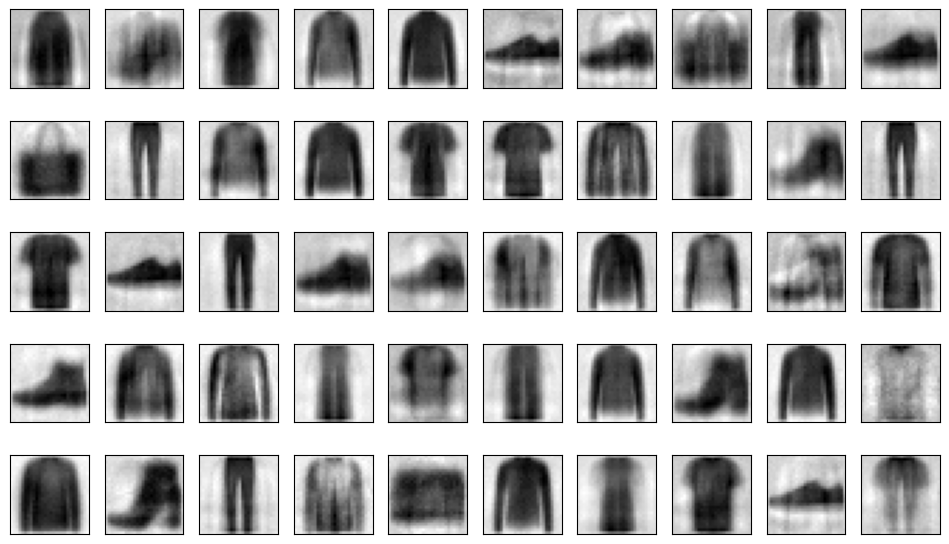

In [39]:
from sklearn.decomposition import PCA

explained_variance = 0.5

pca = PCA(n_components=explained_variance)
X_test_noisy_reduced = pca.fit_transform(X_test_noisy)
restored_X_test_noisy = pca.inverse_transform(X_test_noisy_reduced)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:** ###

После добавления шума к тестовым данным и последующего применения PCA с различными значениями параметра `explained_variance` можно сделать следующие выводы.

1. При малых значениях `explained_variance` (0.1–0.3) на восстановленных изображениях заметно сильное сглаживание:
   предметы становятся размытыми, часть деталей теряется, однако уровень шума существенно ниже исходного.

2. При средних значениях `explained_variance` (примерно 0.5–0.7) достигается компромисс:
   структура уже хорошо различима, а шум по сравнению с исходными зашумлёнными изображениями заметно снижен.
   Визуально это выглядит как наиболее удачный баланс между удалением шума и сохранением информации.

3. При больших значениях `explained_variance` (0.8–0.9) PCA сохраняет почти всю дисперсию исходных данных.
   Восстанавливаемые изображения становятся похожи на исходные зашумлённые — вместе с полезным сигналом
   модель возвращает и большинство шумовых компонент.

Таким образом, PCA можно рассматривать как метод подавления шума: отбрасывая компоненты с малой дисперсией,
мы частично удаляем шум, предполагая, что основная структура данных лежит в подпространстве, задаваемом первыми
главными компонентами. Однако слишком сильное уменьшение размерности приводит к потере полезных деталей, поэтому
важно подобрать значение `explained_variance`, обеспечивающее разумный компромисс между качеством восстановления
и уровнем шума.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [40]:
y_pred_restored = log_reg.predict(restored_X_test_noisy)

f1_restored = f1_score(y_test, y_pred_restored, average='weighted')
print("Weighted F1 on denoised test:", f1_restored)

Weighted F1 on denoised test: 0.6325674779696421


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

**Ваши выводы:** ###

После применения PCA f1-score увеличился, что говорит об уменьшении шума, в следствие чего улучшении качества модели

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:** ###

### Градиент функции потерь в SNE и t-SNE

Функция потерь (дивергенция Кульбака–Лейблера между матрицами $P$ и $Q$) задаётся как
$$
C = KL(P\|Q) = \sum_{i,j} p_{ij} \log\frac{p_{ij}}{q_{ij}}.
$$
Матрица $P = \{p_{ij}\}$ фиксирована, а $Q = \{q_{ij}\}$ зависит от низкоразмерных представлений $y_i$.
Поэтому при дифференцировании по $y_i$ учитываем только зависимость $q_{ij}(y)$.

---

#### Симметричная SNE

---

### Градиент в симметричной SNE

В симметричной SNE низкоразмерные вероятности задаются так:
$$
q_{ij} = \frac{\exp\bigl(-\|y_i - y_j\|^2\bigr)}
             {\sum\limits_{k\neq l} \exp\bigl(-\|y_k - y_l\|^2\bigr)},
\qquad q_{ii} = 0.
$$

Обозначим:
- числитель  
  $$
  f_{ij} = \exp\bigl(-\|y_i - y_j\|^2\bigr),
  $$
- общий знаменатель  
  $$
  Z = \sum_{k\neq l} f_{kl}.
  $$

Тогда
$$
q_{ij} = \frac{f_{ij}}{Z}.
$$

Функция потерь (симметричная SNE):
$$
C = \sum_{i,j} p_{ij} \log\frac{p_{ij}}{q_{ij}}
  = \text{const} - \sum_{i,j} p_{ij} \log q_{ij}.
$$

Нас интересует градиент по вектору $y_i$.



#### Переписываем $C$ через $f_{ij}$ и $Z$

Подставим $q_{ij} = f_{ij}/Z$:
$$
\log q_{ij} = \log f_{ij} - \log Z.
$$

Тогда
$$
C = \text{const} - \sum_{i,j} p_{ij} (\log f_{ij} - \log Z)
  = \text{const} - \sum_{i,j} p_{ij}\log f_{ij}
    + \sum_{i,j} p_{ij}\log Z.
$$

Так как матрица $P$ — вероятностная, $\sum_{i,j} p_{ij} = 1$, значит
$$
C = \text{const}' - \sum_{i,j} p_{ij}\log f_{ij} + \log Z.
$$

Производная по $y_i$:
$$
\frac{\partial C}{\partial y_i}
= - \sum_{j} p_{ij} \frac{1}{f_{ij}} \frac{\partial f_{ij}}{\partial y_i}
  - \sum_{j} p_{ji} \frac{1}{f_{ji}} \frac{\partial f_{ji}}{\partial y_i}
  + \frac{1}{Z} \frac{\partial Z}{\partial y_i}.
$$

Здесь мы явно выписали две суммы: по парам $(i,j)$ и $(j,i)$, в которых фигурирует $y_i$.


#### Производная $f_{ij}$ по $y_i$

Напомним:
$$
f_{ij} = \exp\bigl(-\|y_i - y_j\|^2\bigr),
\qquad
\|y_i - y_j\|^2 = (y_i - y_j)^\top (y_i - y_j).
$$

Сначала дифференцируем квадрат расстояния:
$$
\frac{\partial}{\partial y_i}\bigl(-\|y_i - y_j\|^2\bigr)
= -2 (y_i - y_j).
$$

Значит
$$
\frac{\partial f_{ij}}{\partial y_i}
= f_{ij} \cdot \frac{\partial}{\partial y_i}\bigl(-\|y_i - y_j\|^2\bigr)
= -2 f_{ij}(y_i - y_j).
$$

Отсюда
$$
\frac{1}{f_{ij}} \frac{\partial f_{ij}}{\partial y_i}
= -2 (y_i - y_j).
$$

Для $f_{ji}$ всё то же самое, потому что
$\|y_j - y_i\|^2 = \|y_i - y_j\|^2$:
$$
\frac{1}{f_{ji}} \frac{\partial f_{ji}}{\partial y_i}
= -2 (y_i - y_j).
$$



#### Производная $Z$ по $y_i$

Напомним:
$$
Z = \sum_{k\neq l} f_{kl}.
$$

От $y_i$ зависят только слагаемые с $k=i$ или $l=i$:
$$
\frac{\partial Z}{\partial y_i}
= \sum_{j\neq i} \frac{\partial f_{ij}}{\partial y_i}
  + \sum_{j\neq i} \frac{\partial f_{ji}}{\partial y_i}.
$$

Подставим найденную производную:
$$
\frac{\partial f_{ij}}{\partial y_i}
= -2 f_{ij}(y_i - y_j),
\qquad
\frac{\partial f_{ji}}{\partial y_i}
= -2 f_{ji}(y_i - y_j) = -2 f_{ij}(y_i - y_j),
$$
поэтому
$$
\frac{\partial Z}{\partial y_i}
= \sum_{j\neq i} \bigl(-2 f_{ij}(y_i - y_j)\bigr)
  + \sum_{j\neq i} \bigl(-2 f_{ij}(y_i - y_j)\bigr)
= -4 \sum_{j\neq i} f_{ij}(y_i - y_j).
$$

Теперь
$$
\frac{1}{Z} \frac{\partial Z}{\partial y_i}
= -4 \sum_{j\neq i} \frac{f_{ij}}{Z}(y_i - y_j)
= -4 \sum_{j\neq i} q_{ij}(y_i - y_j).
$$

Так как $q_{ii} = 0$, можно просто писать сумму по всем $j$:
$$
\frac{1}{Z} \frac{\partial Z}{\partial y_i}
= -4 \sum_{j} q_{ij}(y_i - y_j).
$$



#### Собираем всё в одну формулу

Вернёмся к производной $C$:
$$
\frac{\partial C}{\partial y_i}
= - \sum_{j} p_{ij} \Bigl(-2 (y_i - y_j)\Bigr)
  - \sum_{j} p_{ji} \Bigl(-2 (y_i - y_j)\Bigr)
  + \frac{1}{Z} \frac{\partial Z}{\partial y_i}.
$$

Подставим выражение для $\frac{1}{Z}\frac{\partial Z}{\partial y_i}$:
$$
\frac{\partial C}{\partial y_i}
= 2 \sum_{j} p_{ij}(y_i - y_j)
  + 2 \sum_{j} p_{ji}(y_i - y_j)
  - 4 \sum_{j} q_{ij}(y_i - y_j).
$$

В симметричной SNE матрица $P$ симметрична: $p_{ij} = p_{ji}$.
Тогда
$$
2 \sum_{j} p_{ij}(y_i - y_j)
+ 2 \sum_{j} p_{ji}(y_i - y_j)
= 4 \sum_{j} p_{ij}(y_i - y_j).
$$

И окончательно получаем:
$$
\boxed{
\frac{\partial C}{\partial y_i}
= 4 \sum_{j} (p_{ij} - q_{ij})(y_i - y_j)
}
$$



Если для пары $(i,j)$ в высокомерном пространстве точки близки, но в низком — далеки, то $p_{ij} > q_{ij}$ и
вклад $(p_{ij}-q_{ij})(y_i - y_j)$ тянет точки друг к другу.
Если наоборот $p_{ij} < q_{ij}$, то точки в низком измерении слишком близко — градиент их отталкивает.

---

#### t-SNE

---

В t-SNE используется тяжёлохвостое распределение Стьюдента:
$$
q_{ij} = \frac{\left(1 + \|y_i - y_j\|^2\right)^{-1}}
             {\sum\limits_{k\neq l} \left(1 + \|y_k - y_l\|^2\right)^{-1}},
\qquad q_{ii} = 0.
$$

Аналогичное вычисление производной по $y_i$ даёт:
$$
\boxed{
\frac{\partial C}{\partial y_i}
= 4 \sum_{j} (p_{ij} - q_{ij}) \,
\frac{(y_i - y_j)}{1 + \|y_i - y_j\|^2}
}
$$

По сравнению с симметричной SNE здесь появляется множитель
$$
\frac{1}{1 + \|y_i - y_j\|^2},
$$
который ослабляет взаимодействие удалённых точек. Это помогает бороться с проблемой
переполнения: тяжёлохвостое распределение позволяет «раздвинуть» кластеры в низкоразмерном
пространстве и лучше сохранять локальную структуру данных.

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [50]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

Данные

In [58]:
X = data.values.astype(float)   # (n, d)
n, d = X.shape

Матрица расстояний

In [52]:
def compute_squared_distances(Y):
    sum_Y = np.sum(Y**2, axis=1)
    D = sum_Y[:, None] + sum_Y[None, :] - 2 * Y @ Y.T
    D = np.maximum(D, 0.0)
    return D

Построение матрицы $P$

In [53]:
def build_P_knn(X, k):
    n = X.shape[0]
    D = compute_squared_distances(X)
    np.fill_diagonal(D, np.inf)

    P_cond = np.zeros((n, n), dtype=float)

    for j in range(n):
        nn_idx = np.argsort(D[:, j])[:k]   
        P_cond[nn_idx, j] = 1.0 / k

    P = (P_cond + P_cond.T) / (2.0 * n)
    np.fill_diagonal(P, 0.0)

    P /= P.sum()
    return P

Симметричная SNE: loss + grad

In [54]:
def sne_loss_and_grad(ylat, P):
    n = P.shape[0]
    Y = ylat.reshape(n, 2)

    D = compute_squared_distances(Y)
    np.fill_diagonal(D, 0.0)

    F = np.exp(-D)
    np.fill_diagonal(F, 0.0)
    Z = F.sum()
    Q = F / Z

    eps = 1e-12
    C = np.sum(P * np.log((P + eps) / (Q + eps)))

    PQ = P - Q                    
    diff = Y[:, None, :] - Y[None, :, :]
    grad = 4.0 * np.sum(PQ[:, :, None] * diff, axis=1)  

    return C, grad.ravel()

t-SNE: loss + grad

In [55]:
def tsne_loss_and_grad(ylat, P):
    n = P.shape[0]
    Y = ylat.reshape(n, 2)

    D = compute_squared_distances(Y)
    np.fill_diagonal(D, 0.0)

    F = 1.0 / (1.0 + D)
    np.fill_diagonal(F, 0.0)
    Z = F.sum()
    Q = F / Z

    eps = 1e-12
    C = np.sum(P * np.log((P + eps) / (Q + eps)))

    PQ = P - Q
    diff = Y[:, None, :] - Y[None, :, :]
    W = PQ * F
    grad = 4.0 * np.sum(W[:, :, None] * diff, axis=1)

    return C, grad.ravel()

In [62]:
k = 15
P = build_P_knn(X, k)

rng = np.random.default_rng(42)
Y0 = rng.normal(scale=1e-4, size=(n, 2))

Оптимизация

In [65]:
res_sne = minimize(
    fun=lambda y: sne_loss_and_grad(y, P),
    x0=Y0.ravel(),
    jac=True
)
Y_sne = res_sne.x.reshape(n, 2)

res_tsne = minimize(
    fun=lambda y: tsne_loss_and_grad(y, P),
    x0=Y0.ravel(),
    jac=True
)
Y_tsne = res_tsne.x.reshape(n, 2)

Визуализация

Text(0.5, 1.0, 't-SNE, k=15')

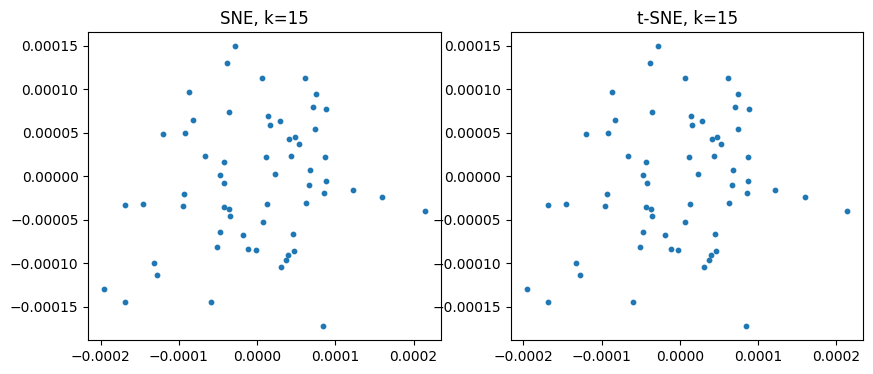

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(Y_sne[:, 0], Y_sne[:, 1], s=10)
axes[0].set_title(f"SNE, k={k}")

axes[1].scatter(Y_tsne[:, 0], Y_tsne[:, 1], s=10)
axes[1].set_title(f"t-SNE, k={k}")

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

perplexity= 5, time=0.45 s
perplexity=20, time=0.68 s
perplexity=50, time=0.35 s


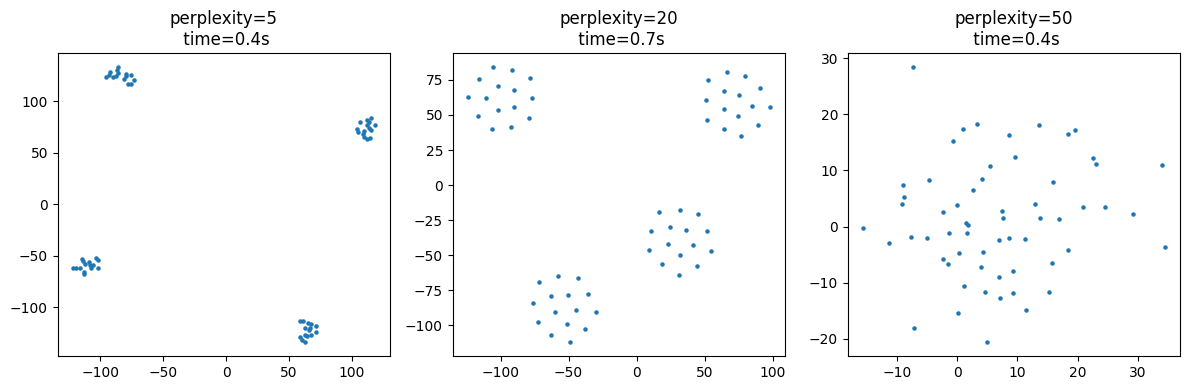

early_exaggeration= 4.0, time=0.36 s
early_exaggeration=12.0, time=0.53 s
early_exaggeration=30.0, time=0.44 s


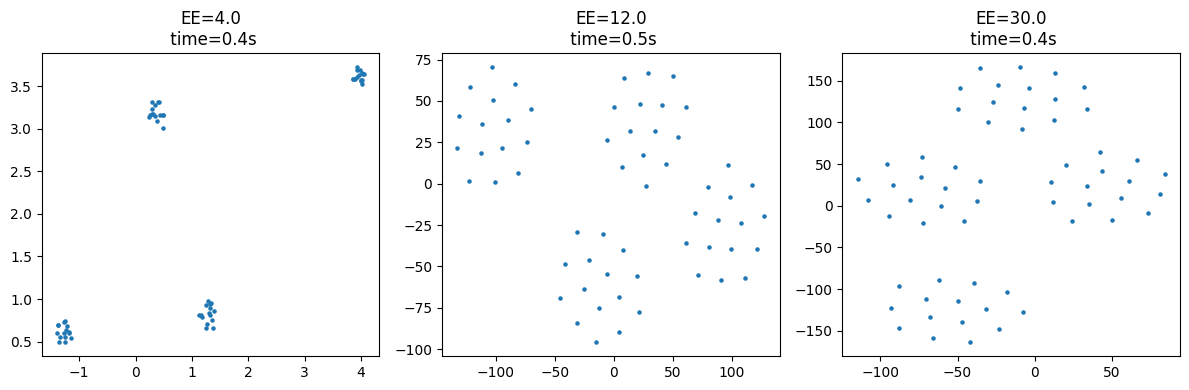

init=random, time=0.49 s
init=pca, time=0.36 s


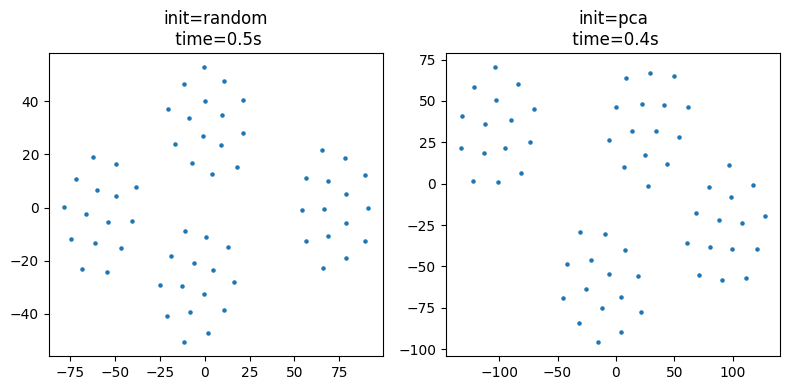

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE

X = data.values.astype(float)
n, d = X.shape

def run_tsne(X, perplexity=30, early_exaggeration=12.0, init="pca", random_state=42, learning_rate=200.0):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        early_exaggeration=early_exaggeration,
        init=init,
        learning_rate=learning_rate,
        random_state=random_state,
    )
    t0 = time.time()
    Y = tsne.fit_transform(X)
    return Y, time.time() - t0


perplexities = [5, 20, 50]
emb_perp = []
for perp in perplexities:
    Y, t_run = run_tsne(X, perplexity=perp)
    emb_perp.append((perp, Y, t_run))
    print(f"perplexity={perp:>2}, time={t_run:.2f} s")

fig, axes = plt.subplots(1, len(perplexities), figsize=(4 * len(perplexities), 4))
for ax, (perp, Y, t_run) in zip(axes, emb_perp):
    ax.scatter(Y[:, 0], Y[:, 1], s=5)
    ax.set_title(f"perplexity={perp}\n time={t_run:.1f}s")
plt.tight_layout()
plt.show()


ees = [4.0, 12.0, 30.0]
emb_ee = []
for ee in ees:
    Y, t_run = run_tsne(X, perplexity=30, early_exaggeration=ee)
    emb_ee.append((ee, Y, t_run))
    print(f"early_exaggeration={ee:>4}, time={t_run:.2f} s")

fig, axes = plt.subplots(1, len(ees), figsize=(4 * len(ees), 4))
for ax, (ee, Y, t_run) in zip(axes, emb_ee):
    ax.scatter(Y[:, 0], Y[:, 1], s=5)
    ax.set_title(f"EE={ee}\n time={t_run:.1f}s")
plt.tight_layout()
plt.show()


inits = ["random", "pca"]
emb_init = []
for init in inits:
    Y, t_run = run_tsne(X, perplexity=30, init=init)
    emb_init.append((init, Y, t_run))
    print(f"init={init}, time={t_run:.2f} s")

fig, axes = plt.subplots(1, len(inits), figsize=(4 * len(inits), 4))
for ax, (init, Y, t_run) in zip(axes, emb_init):
    ax.scatter(Y[:, 0], Y[:, 1], s=5)
    ax.set_title(f"init={init}\n time={t_run:.1f}s")
plt.tight_layout()
plt.show()

**Выводы**

**Perplexity**

- `perplexity = 5` — очень локальная структура: кластеры сильно сжаты и далеко друг от друга.  
- `perplexity = 20` — кластеры хорошо разделены; наиболее адекватная визуализация.  
- `perplexity = 50` — глобальное сглаживание: кластеры начинают сливаться в одно облако, локальные детали теряются.  
- Время работы почти не меняется (≈0.4–0.7 s).

**Early exaggeration**

- `early_exaggeration = 4` — кластеры плотные, но расположены ближе друг к другу.  
- `early_exaggeration = 12` — кластеры хорошо разъехались и чётко отделены; выглядит оптимально.  
- `early_exaggeration = 30` — кластеры «раздуваются», глобальная структура выглядит менее аккуратно.  
- Время работы примерно одинаковое (≈0.4–0.5 s).

**Initialization**

- `init = random` и `init = pca` дают похожую структуру (разница в повороте/масштабе).  
- При `init = "pca"` embedding получается чуть стабильнее и за немного меньшее время.

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

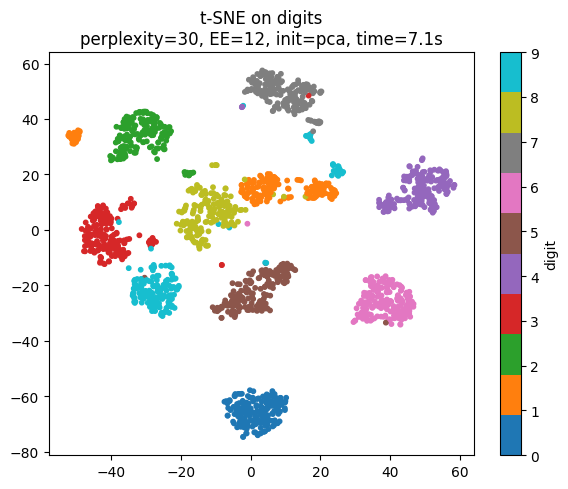

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import time

digits = load_digits()
X = digits.data
y = digits.target

def run_tsne(X, perplexity=30, early_exaggeration=10.0,
             init="pca", learning_rate=200.0,
             random_state=42):
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        early_exaggeration=early_exaggeration,
        init=init,
        learning_rate=learning_rate,
        random_state=random_state,
    )
    t0 = time.time()
    Y = tsne.fit_transform(X)
    return Y, time.time() - t0

Y_tsne, t_run = run_tsne(X)

plt.figure(figsize=(6, 5))
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=y, s=10, cmap="tab10")
plt.colorbar(label="digit")
plt.title(f"t-SNE on digits\nperplexity=30, EE=12, init=pca, time={t_run:.1f}s")
plt.tight_layout()
plt.show()

Как мы видим, модель справилась неплохо, а значит параметры подобраны правильно.